# **Global E-Commerce Transactions Analysis Using Python**


# 5. Operational & Delivery Performance Analysis:

This notebook analyzes **Operational Efficiency, Delivery Performance, Order Outcomes**, and their impact on customer satisfaction and revenue.

---

In [2]:
# Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [3]:
# Dataset:

df = pd.read_csv("Clean_Global_E_Commerce_Transactions.csv")
df.head()

,Transaction_ID,Transaction_Date,Country,State_Region,Drop_City,Customer_Age,Customer_Gender,Product_Category,Order_Value_USD,Payment_Method,Delivery_Type,Delivery_Days,Order_Status,Customer_Rating,Repeat_Customer,Year,Month,Month_Name,Day,Weekday,Order_Value_Segment
0,TXN1000000,2024-04-12,India,Gujarat,Tokyo,24,Female,Fashion,276.15,Net Banking,Express,4,Completed,4.1,Yes,2024,4,April,12,Friday,Medium
1,TXN1000001,2024-12-14,Australia,Delhi,Sydney,31,Female,Travel,415.06,UPI,Express,7,Completed,1.4,No,2024,12,December,14,Saturday,High
2,TXN1000002,2024-09-27,Singapore,Delhi,Berlin,38,Female,Grocery,262.17,Wallet,Standard,6,Completed,4.9,No,2024,9,September,27,Friday,Medium
3,TXN1000003,2024-04-16,India,Telangana,Bengaluru,46,Female,Electronics,440.77,Wallet,Standard,2,Completed,2.3,No,2024,4,April,16,Tuesday,High
4,TXN1000004,2024-03-12,Germany,Maharashtra,Toronto,58,Male,Grocery,361.94,Net Banking,International,6,Completed,3.3,Yes,2024,3,March,12,Tuesday,High


---
1. Order Status Distribution:

In [4]:
order_status = df["Order_Status"].value_counts(normalize=True) * 100
order_status

Order_Status
Completed    85.027636
Cancelled     7.983075
Returned      6.989289
Name: proportion, dtype: float64

- Visualization: Order Status Share (Pie Chart):

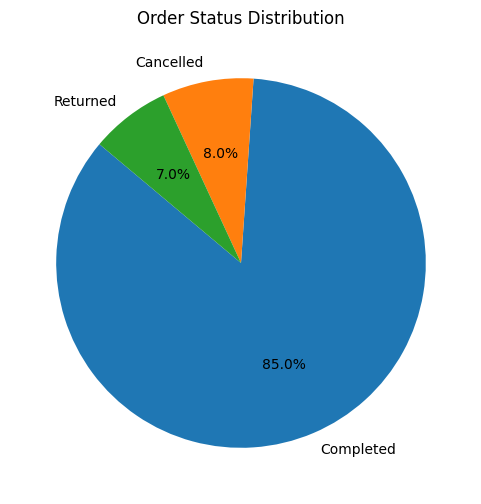

In [5]:
plt.figure(figsize = (6,6))

plt.pie(
    order_status.values,
    labels = order_status.index,
    autopct = "%1.1f%%",
    startangle = 140
)

plt.title("Order Status Distribution")
plt.show()

---
2. Delivery Days Analysis:


In [6]:
delivery_stats = df["Delivery_Days"].describe()
delivery_stats

count    195213.000000
mean          7.488892
std           4.026415
min           1.000000
25%           4.000000
50%           7.000000
75%          11.000000
max          14.000000
Name: Delivery_Days, dtype: float64

---
3) Delivery Performance by Delivery Type:

In [7]:
delivery_type_perf = (
    df.groupby("Delivery_Type")["Delivery_Days"]
      .agg(["mean", "median", "min", "max"])
)

delivery_type_perf

,mean,median,min,max
Delivery_Type,,,,
Express,7.490198,7.0,1,14
International,7.488719,8.0,1,14
Standard,7.487762,7.0,1,14


---
4. Delivery Speed vs Customer Rating:

In [8]:
delivery_rating = (
    df.groupby("Delivery_Days")["Customer_Rating"]
      .mean()
      .reset_index()
)

delivery_rating.head()

,Delivery_Days,Customer_Rating
0,1,2.990691
1,2,2.999173
2,3,3.005268
3,4,3.006928
4,5,2.985287


- Visualization: Delivery Days vs Rating (Line Chart): 

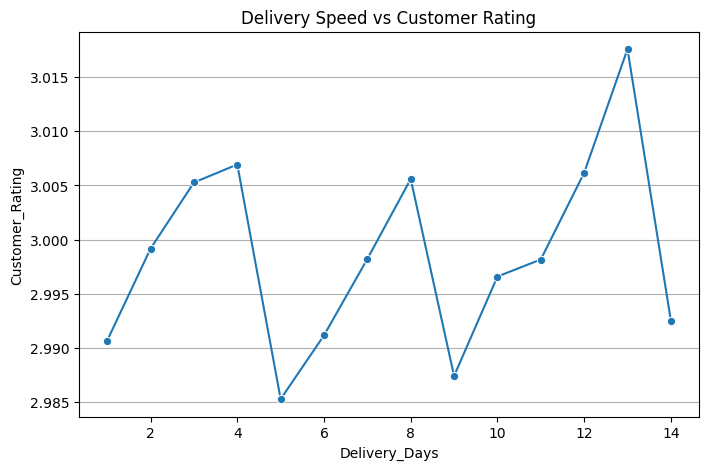

In [9]:
plt.figure(figsize = (8,5))

sns.lineplot(
    data = delivery_rating,
    x = "Delivery_Days",
    y = "Customer_Rating",
    marker="o"
)

plt.grid(axis = 'y')
plt.title("Delivery Speed vs Customer Rating")
plt.show()

---
5. Revenue Loss from Cancellations & Returns:

In [10]:
loss_orders = df[df["Order_Status"].isin(["Cancelled", "Returned"])]

revenue_loss = loss_orders["Order_Value_USD"].sum()
revenue_loss


np.float64(8282922.24)

---
6) Cancellations by Country:

In [11]:
cancel_country = (
    df[df["Order_Status"] == "Cancelled"]
    .groupby("Country")["Transaction_ID"]
    .count()
    .sort_values(ascending = False)
)

cancel_country

Country
USA          1591
Canada       1587
UK           1587
UAE          1577
Australia    1570
France       1548
Japan        1548
Singapore    1547
India        1532
Germany      1497
Name: Transaction_ID, dtype: int64

---
7) Product Categories with Highest Returns:

In [12]:
returns_product = (
    df[df["Order_Status"] == "Returned"]
    .groupby("Product_Category")["Transaction_ID"]
    .count()
    .sort_values(ascending = False)
)

returns_product


Product_Category
Travel         2778
Electronics    2730
Grocery        2719
Fashion        2709
Healthcare     2708
Name: Transaction_ID, dtype: int64

---
8. Delivery Type vs Cancellation Rate:

In [13]:
delivery_cancel = (
    df.groupby(["Delivery_Type", "Order_Status"])
      .size()
      .unstack(fill_value = 0)
)

delivery_cancel

Order_Status,Cancelled,Completed,Returned
Delivery_Type,,,
Express,5208,55087,4489
International,5280,55650,4576
Standard,5096,55248,4579


--- 
9) Cancellation & Return Rate:

In [14]:
cancel_return_rate = (
    df[df["Order_Status"].isin(["Cancelled", "Returned"])].shape[0]
    / df.shape[0]
) * 100

cancel_return_rate

14.972363520872072

---
10) Average Delivery Time:

In [15]:
avg_delivery_time = df["Delivery_Days"].mean()
avg_delivery_time

np.float64(7.488891620947375)

---
# Operational Insights:

- Majority of orders are Successfully Completed.
- **Longer Delivery Times Negatively impact Customer Ratings**.
- Express delivery improves Customer Satisfaction.
- Cancellations and Returns result in notable Revenue Loss.
- Certain product categories show **Higher Return Rates**
---